In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 

In [21]:
X,y = sklearn.datasets.make_moons(200, noise=0.15)

In [7]:
X[:5]

array([[-0.12021434,  0.74399702],
       [ 0.20988013, -0.00833849],
       [ 1.8933403 ,  0.00468809],
       [-0.46070492,  1.08528384],
       [-0.82294547,  0.57234066]])

In [8]:
y[:5]

array([0, 1, 1, 0, 0], dtype=int64)

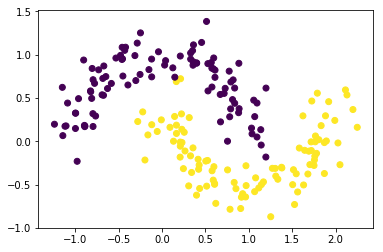

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [87]:
input_neurons=2
output_neurons=2
samples = X.shape[0]
learning_rate = 0.01

lambda_reg = 0.01


In [100]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [101]:

def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) 
    return z1, a1, softmax

In [102]:
def loss(softmax,y,model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    m=np.zeros(200)
    for i, index in enumerate(y):
        predicted = softmax[i][index]
        m[i]=predicted
    log_prob = -np.log(predicted)
    softmaxloss=np.sum(log_prob)
    reg_loss =lambda_reg /2 * ( np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss = softmaxloss + reg_loss
    return float(loss / y.shape[0])

In [103]:
y

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [104]:
softmax

array([[-1.77368605e+00, -3.29388919e-01],
       [ 3.43903585e-02, -1.13737670e+00],
       [-2.53082222e-01, -1.34222767e+00],
       [-1.09917720e+00,  2.70924180e-01],
       [-9.44741175e-01,  1.21933882e+00],
       [-6.30917054e-01,  1.45678667e+00],
       [ 4.20581092e-01,  1.94846359e-02],
       [ 7.77675267e-01,  9.01933898e-01],
       [-6.03680152e-02,  3.48696955e-01],
       [-4.86443406e-01,  2.46994463e-01],
       [ 2.94109341e-01, -1.11098051e+00],
       [ 1.67876828e+00,  8.53397116e-01],
       [-1.16629072e-02,  8.55209019e-01],
       [-1.02979929e+00, -1.52727960e+00],
       [ 1.34392845e+00, -8.45804191e-01],
       [-2.00099486e+00, -1.72549183e-01],
       [ 7.81788251e-01, -6.39949895e-01],
       [-7.86981855e-01,  2.17774881e-01],
       [-7.26556528e-01, -4.90228930e-01],
       [-5.60323197e-01,  2.47589584e+00],
       [-4.47591072e-01,  1.10626678e+00],
       [ 1.14335312e+00, -3.26063790e-01],
       [-4.61306848e-01, -4.40239949e-01],
       [ 8.

In [105]:
y[0]

1

In [106]:
softmax[0][1]

-0.3293889187470215

In [107]:
def predict(x, model_dict):
    W1,b1,W2,b2 = retrieve(model_dict)
    z1 = X.dot(W1) +b1
    a1 = np.tanh(z1)
    z2 = X.dot(a1) +b2
    a2 = np.tanh(z2)
    exp_scores = np.exp(a2)
    softmax =exp_scores / np.sum(exp_scores, dim=1, keep_dims=True)
    return np.argmax(softmax,axis=1)
    

In [108]:

def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict

In [109]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}
    # Xavier Initialization 
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1
    model['b1'] = b1
    model['W2'] = W2
    model['b2'] = b2
    return model
    

In [113]:
# Now Let's start the action
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(X, y, model_dict, 1000)
#plot_decision_boundary(lambda x: predict(model, x))

Loss at epoch 0 is: 0.002
Loss at epoch 50 is: 0.001
Loss at epoch 100 is: 0.001
Loss at epoch 150 is: 0.002
Loss at epoch 200 is: 0.002
Loss at epoch 250 is: 0.003
Loss at epoch 300 is: 0.003
Loss at epoch 350 is: 0.003
Loss at epoch 400 is: 0.003
Loss at epoch 450 is: 0.003
Loss at epoch 500 is: 0.004
Loss at epoch 550 is: 0.004
Loss at epoch 600 is: 0.004
Loss at epoch 650 is: 0.004
Loss at epoch 700 is: 0.004
Loss at epoch 750 is: 0.004
Loss at epoch 800 is: 0.004
Loss at epoch 850 is: 0.005
Loss at epoch 900 is: 0.005
Loss at epoch 950 is: 0.005
